Thres = 0 (all certainty sampling), no cap for recall, sample till the end:

In [16]:
%load_ext autoreload
%autoreload 2
from display import *
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


total = 186, thres = 0  


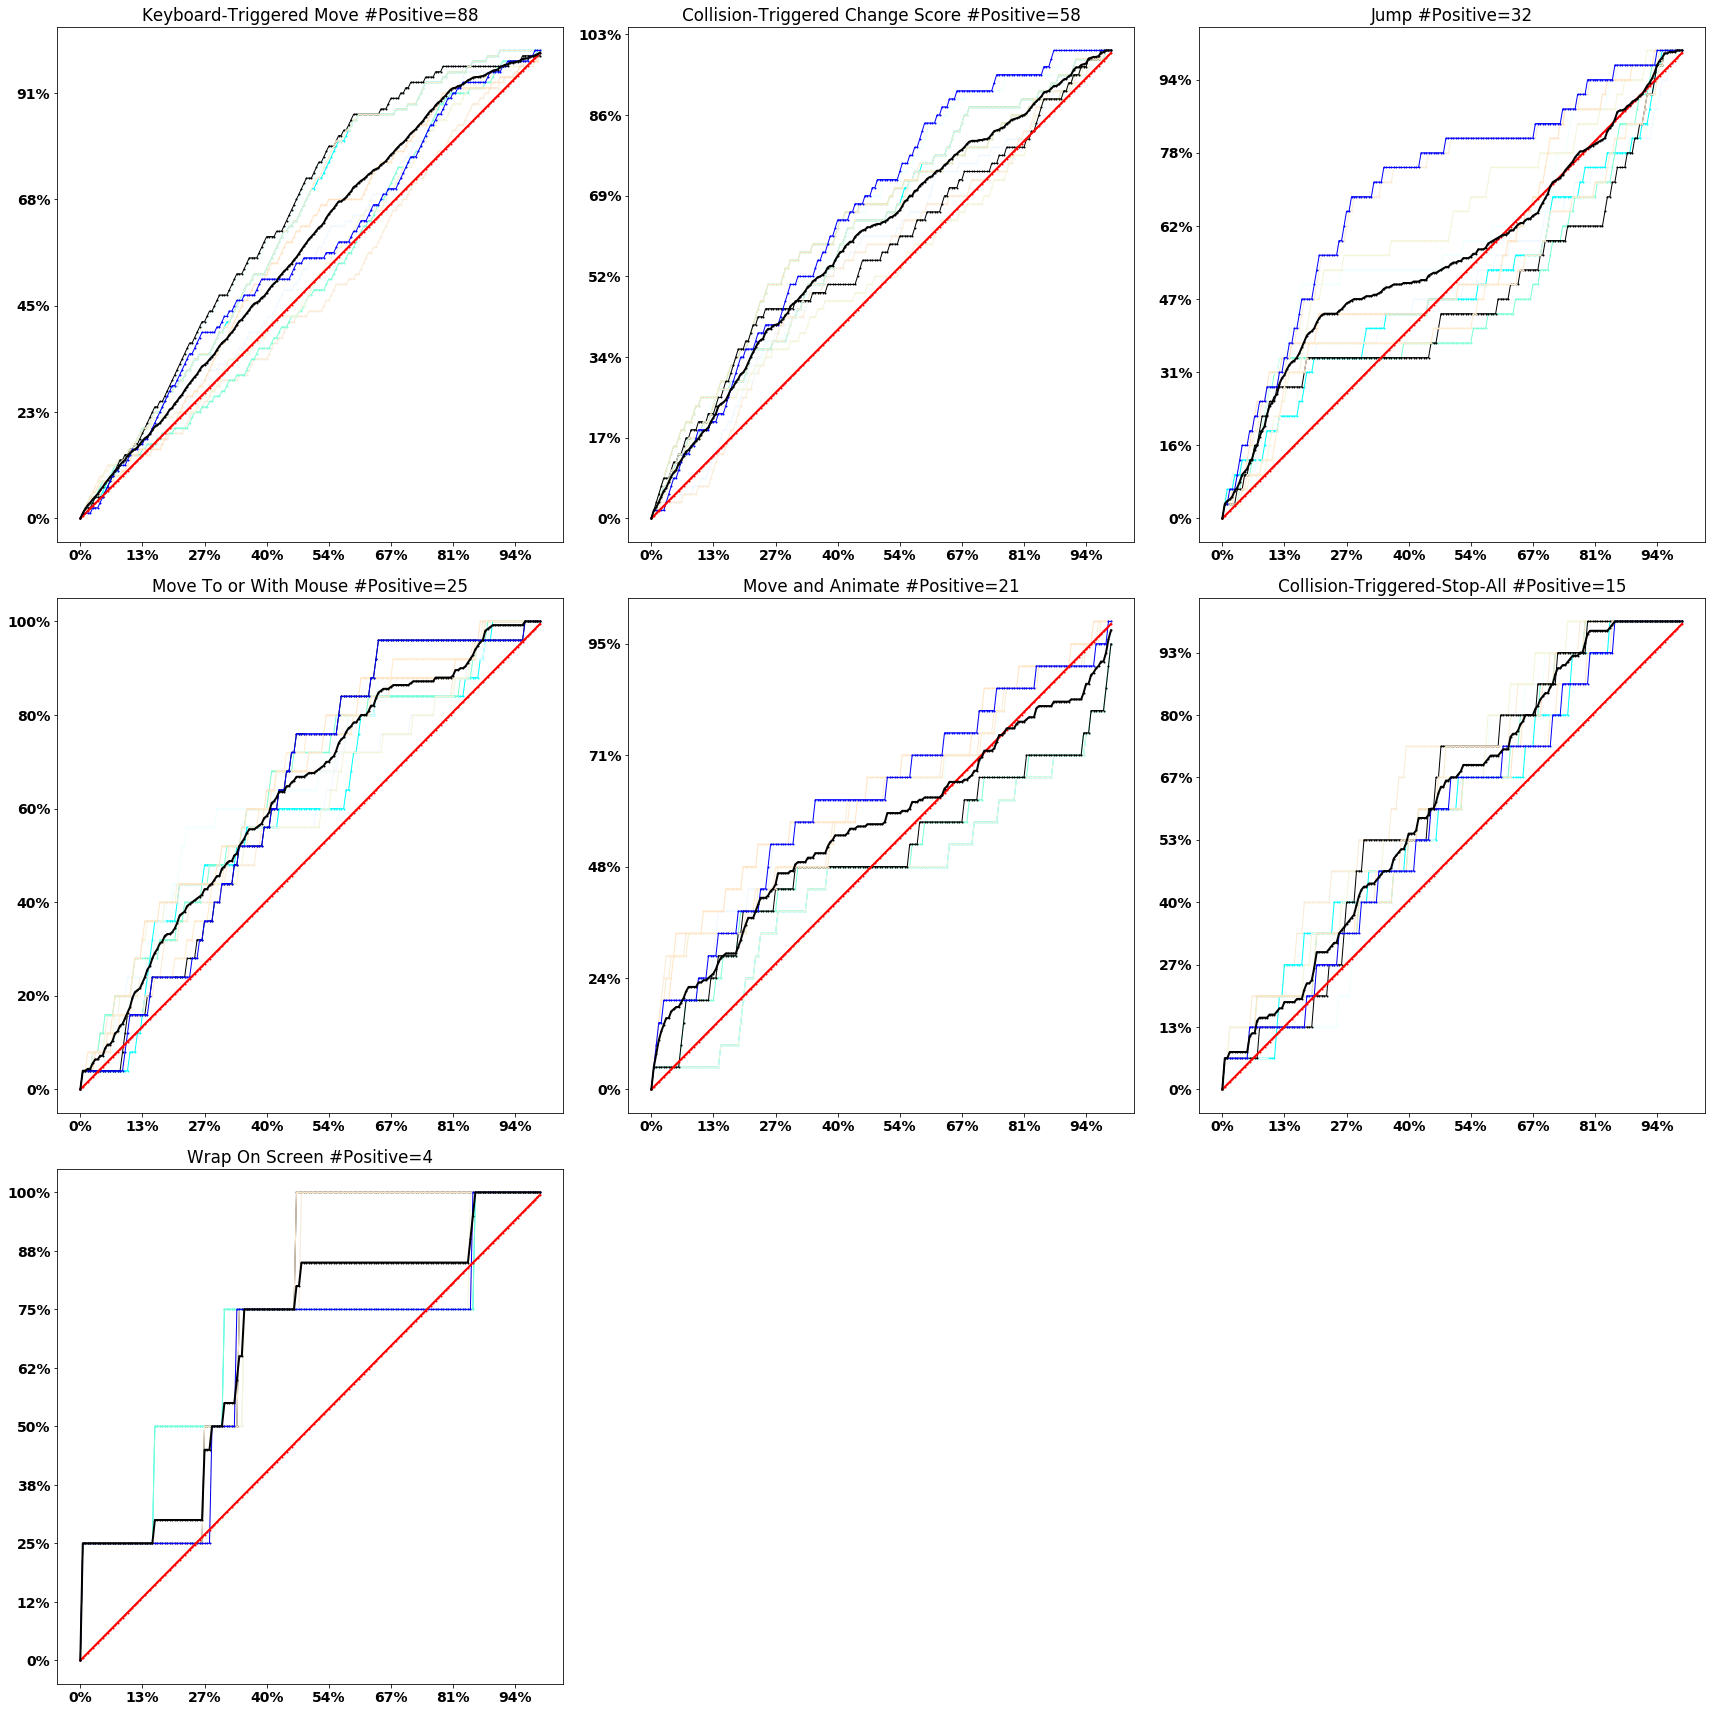

In [30]:
plot_all(186, 0, "")

total = 415, thres = 0  repetition_10_times/


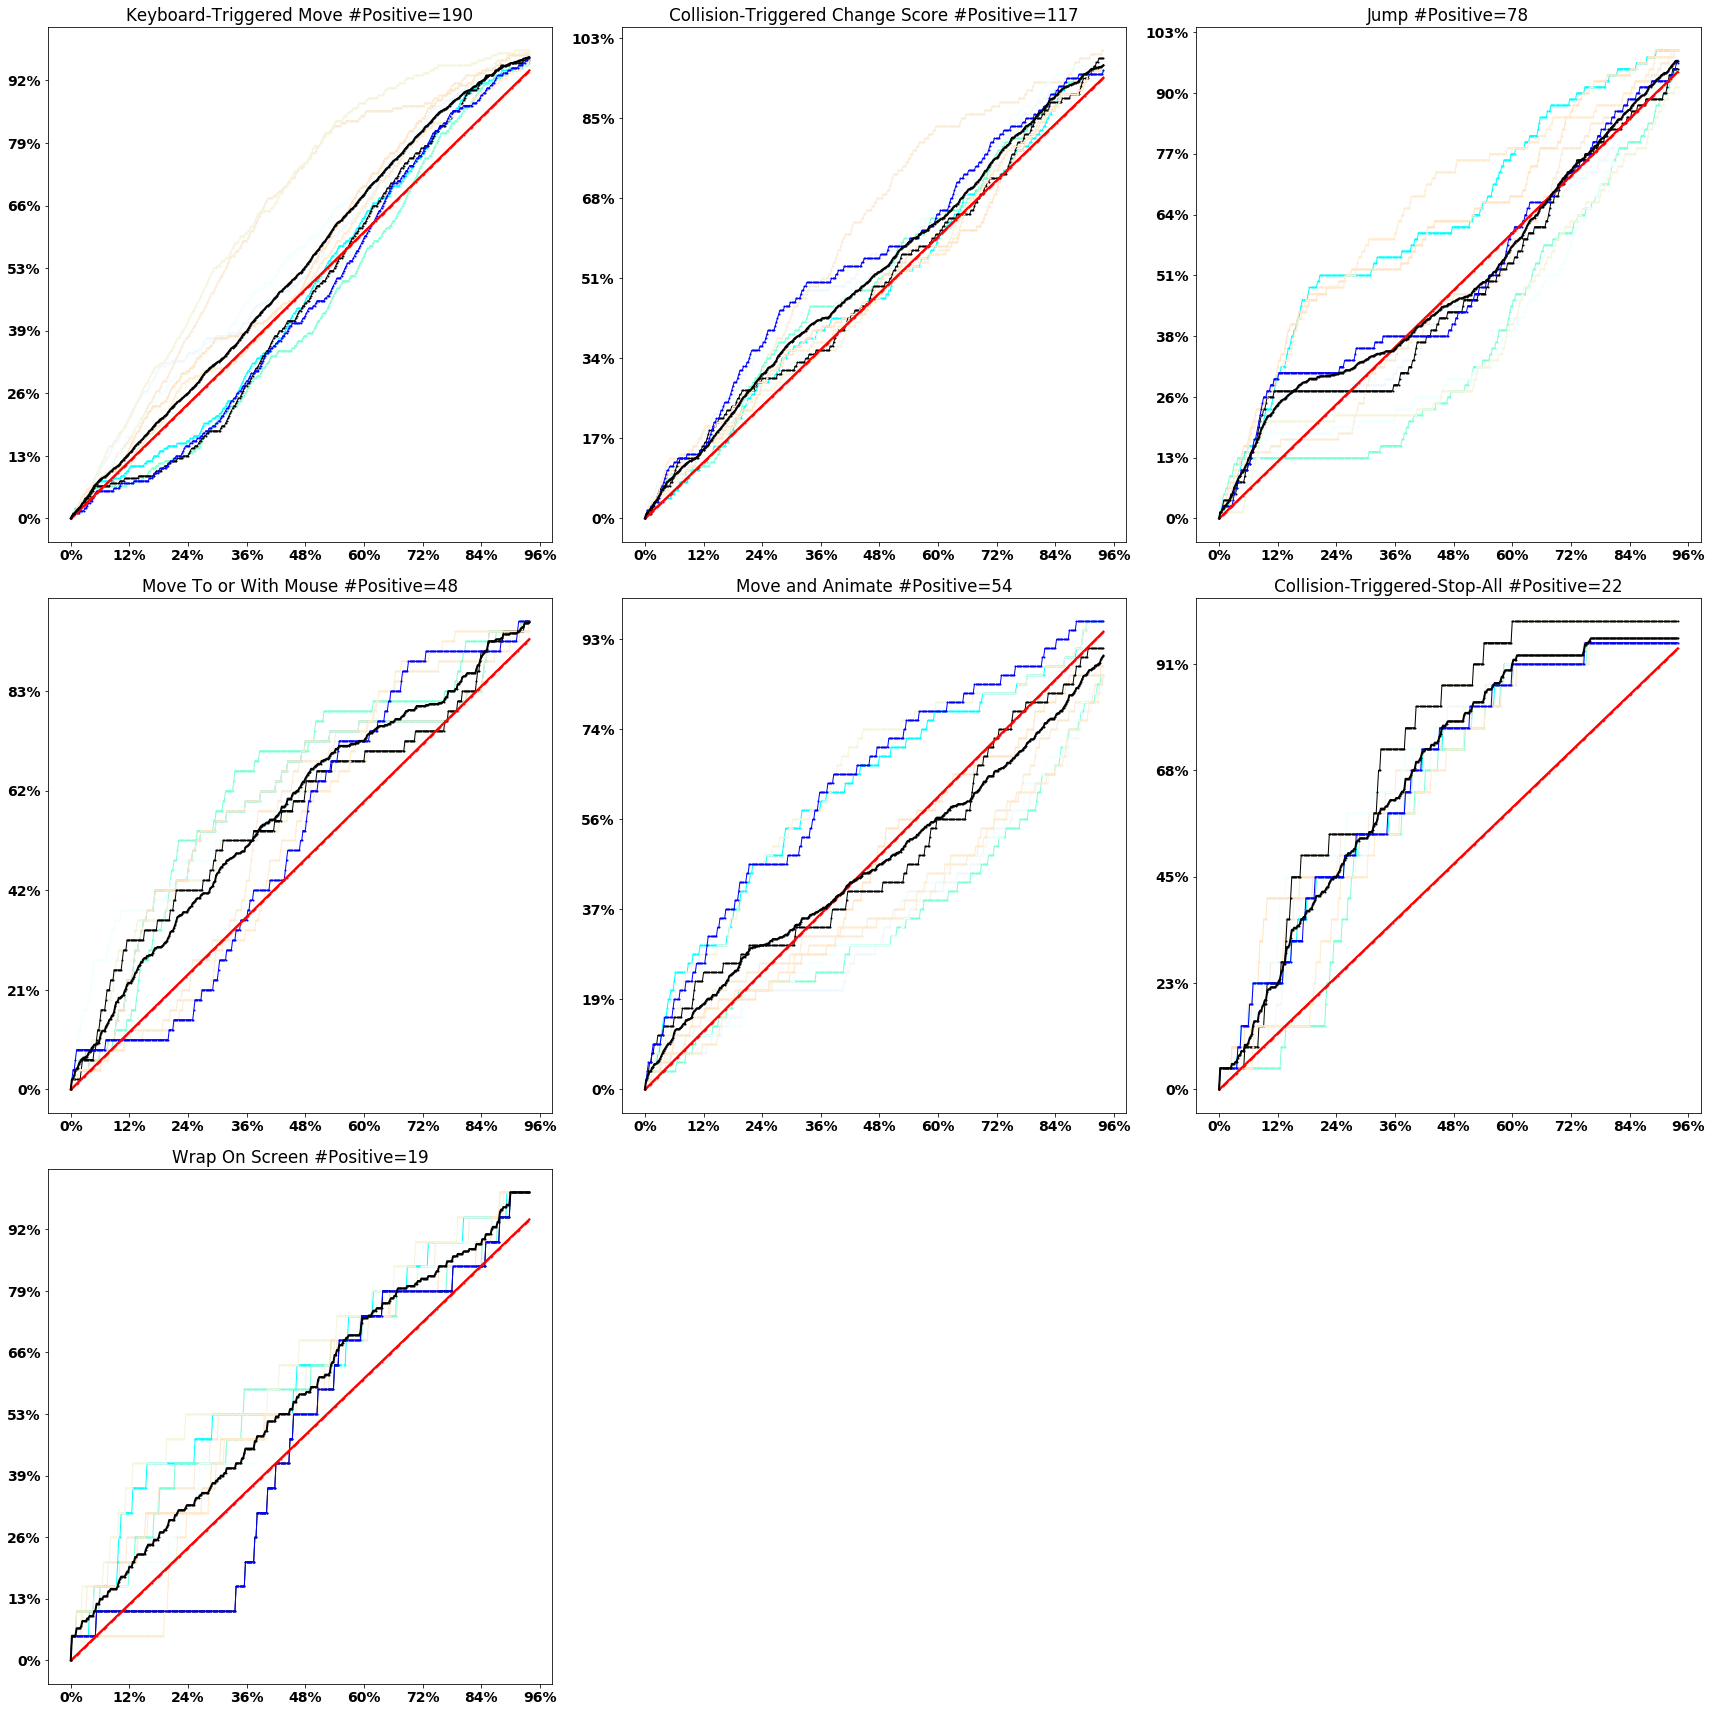

In [29]:
plot_all(415, 0, "repetition_10_times/")

total = 415, thres = 0  repetition_10_times_no_pole/
Kernel for this is : RBF


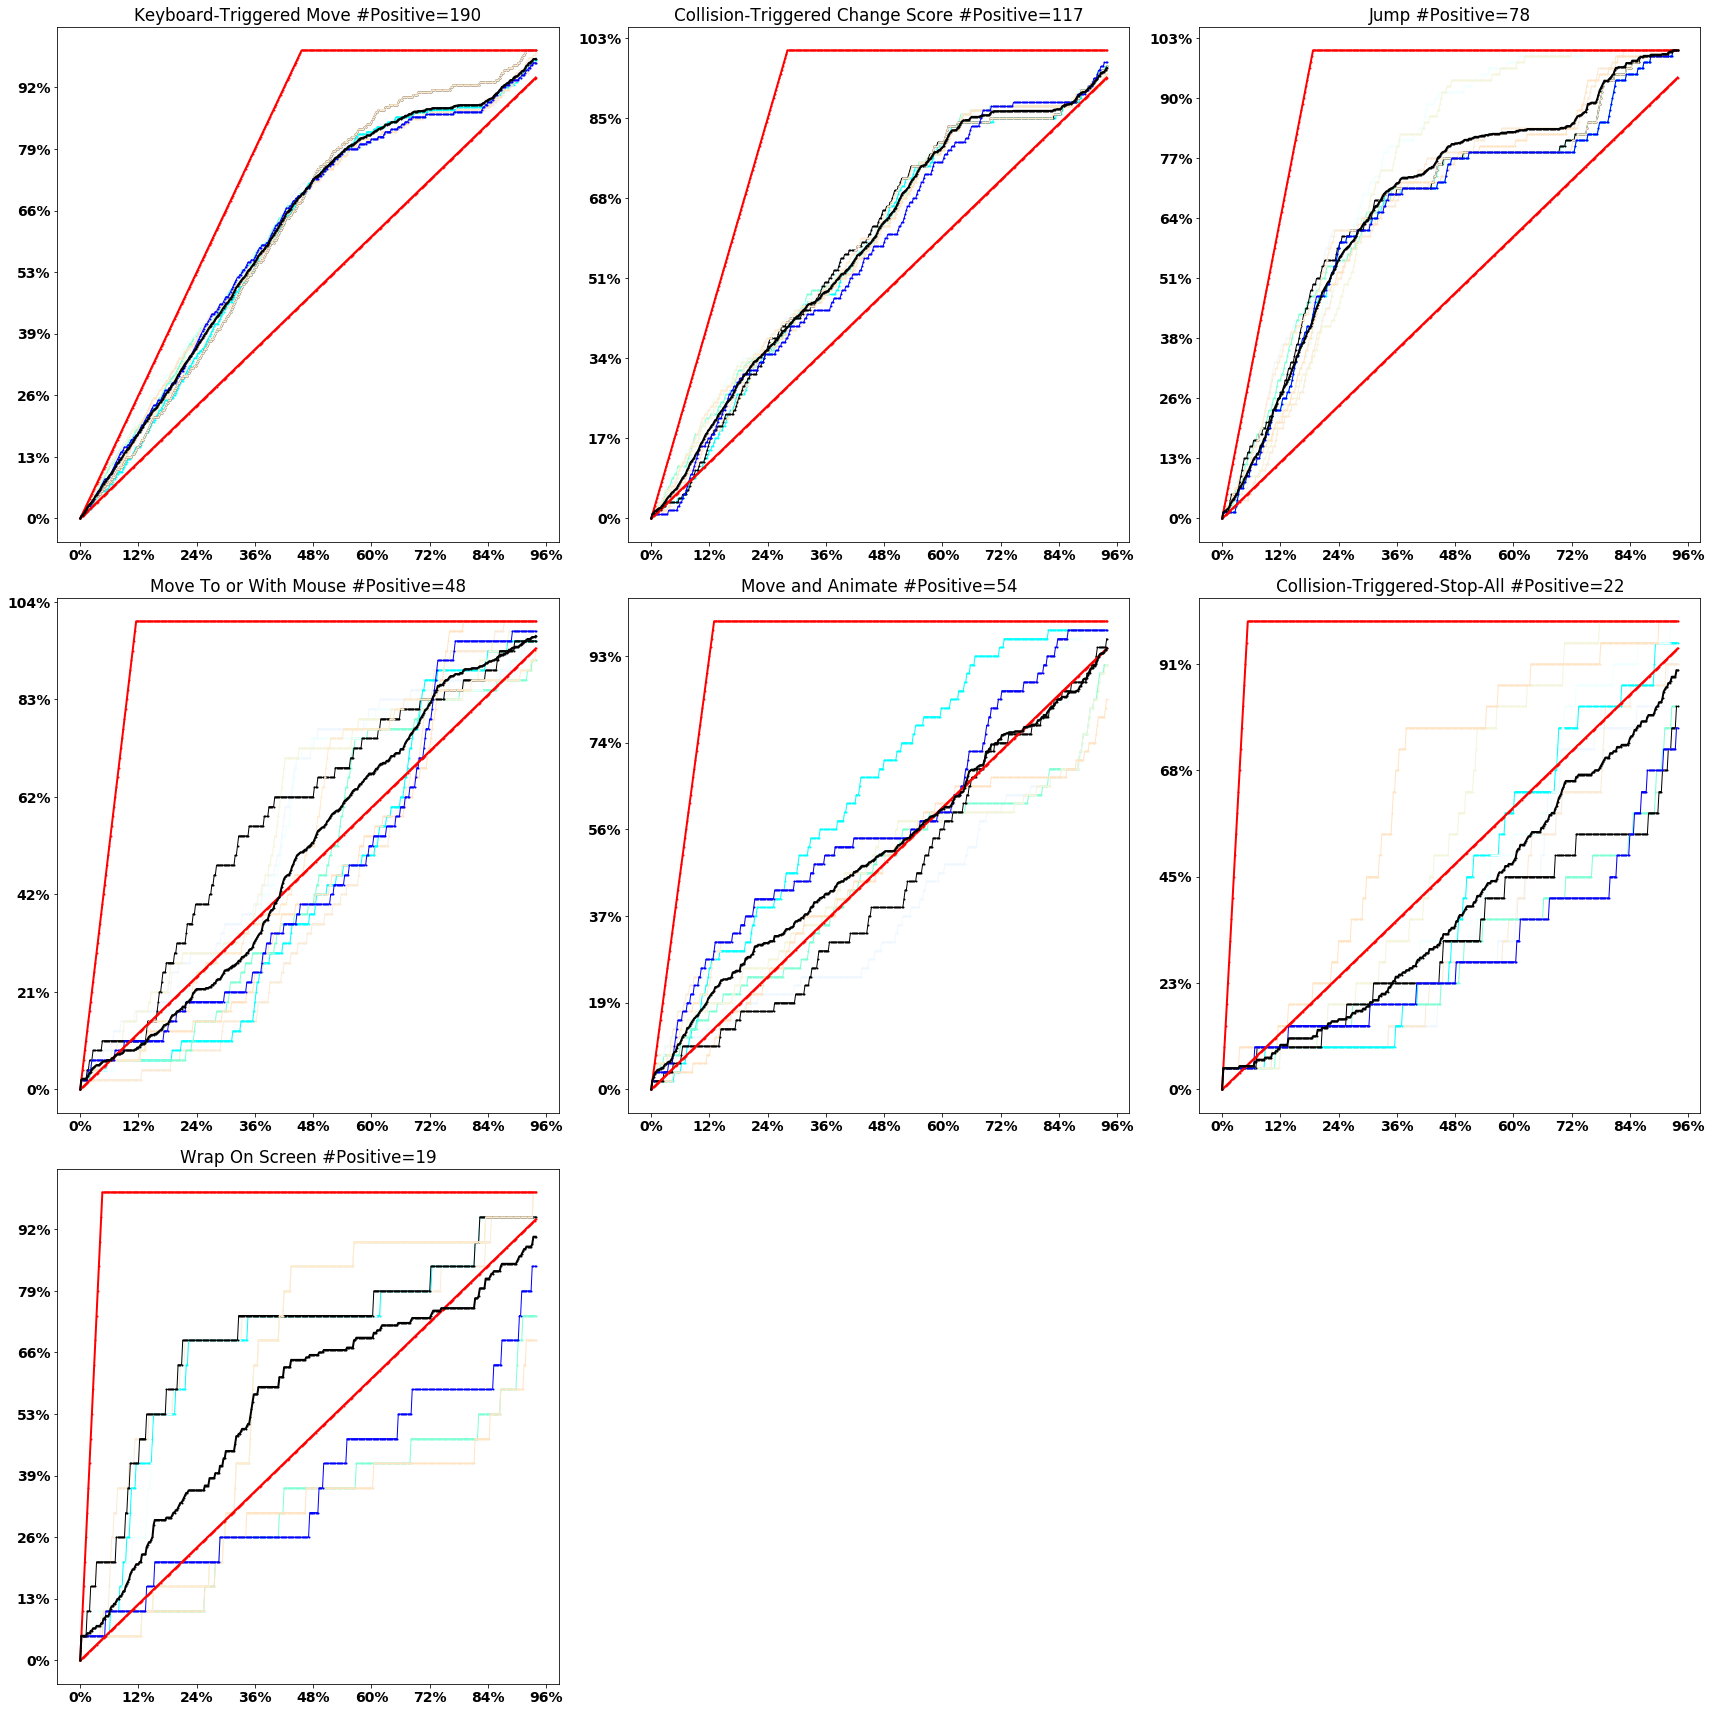

In [33]:
plot_all(415, 0, "repetition_10_times_no_pole/")
print("Kernel for this is : RBF")

In [ ]:
total = 415
thres = 0
plot_all(total, thres, "most_pole", "RBF_kernel_same_as_aggresive_undersampling")

when thres is -1, it means thres == total real//2. (e.g. 85 for keyboard move, 27 for move animate, etc)

In [ ]:
total = 415
thres = -1
plot_all(total, thres, "most_pole", "RBF_kernel_same_as_aggresive_undersampling")